# Bibina 
# Clickbait Detection

In [1]:
#Importing required libraries
import pandas as pandasCBPackage
import matplotlib.pyplot as matPlotCBPackage
import seaborn as snsCBPackage
from wordcloud import WordCloud as wcCBPackage
import warnings as wngsCBPackage
wngsCBPackage.filterwarnings('ignore')


In [3]:
# Upload the dataset
datasetFilePath = 'clickbait_data.csv'
inputKaggleData = pandasCBPackage.read_csv(datasetFilePath)

# Data Pre-processing

In [6]:

print("Blank Data in each columns", inputKaggleData.isnull().sum())
print("Duplicated Data", inputKaggleData.duplicated().sum())


Blank Data in each columns headline     0
clickbait    0
dtype: int64
Duplicated Data 0


In [8]:
print(inputKaggleData.info())
print(inputKaggleData['clickbait'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB
None
clickbait
0    16001
1    15999
Name: count, dtype: int64


# Data Analysis

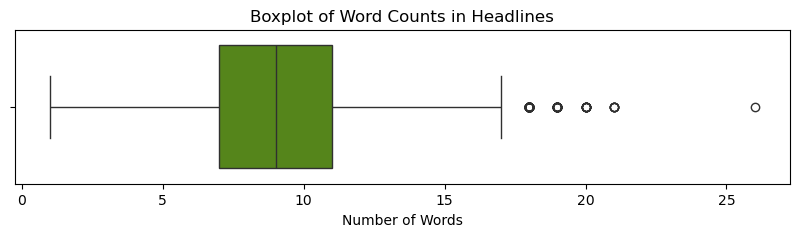

In [13]:
# Ensure 'word_count' column is present
inputKaggleData['word_count'] = inputKaggleData['headline'].apply(lambda x: len(x.split()))

# Configuring the  the boxplot picture
matPlotCBPackage.figure(figsize=(10, 2))  # Horizontal layout
snsCBPackage.boxplot(x=inputKaggleData['word_count'], color='#579709')
matPlotCBPackage.title('Boxplot of Word Counts in Headlines')
matPlotCBPackage.xlabel('Number of Words')
matPlotCBPackage.show()

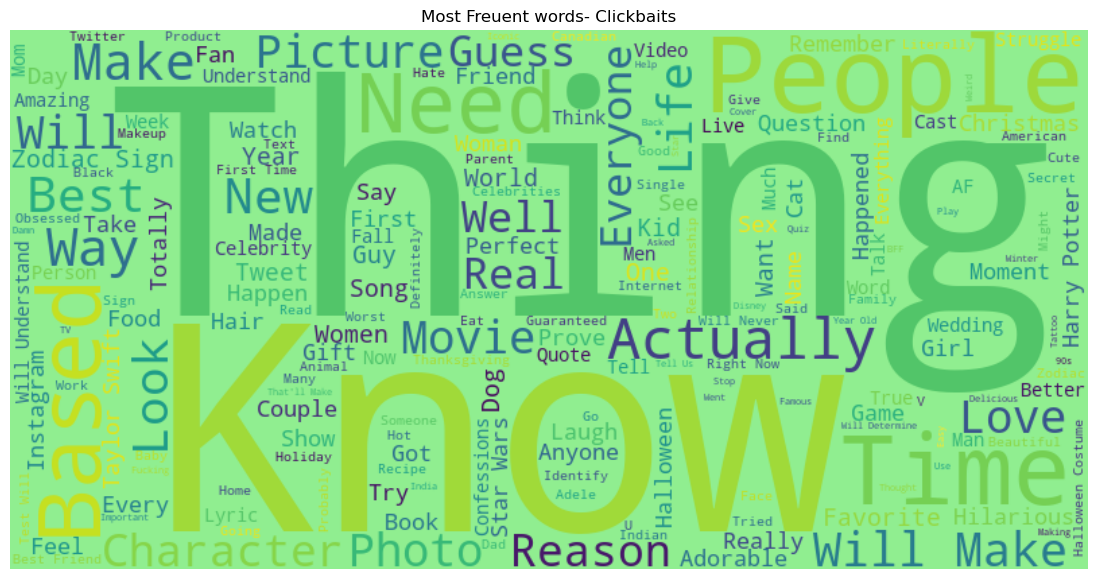

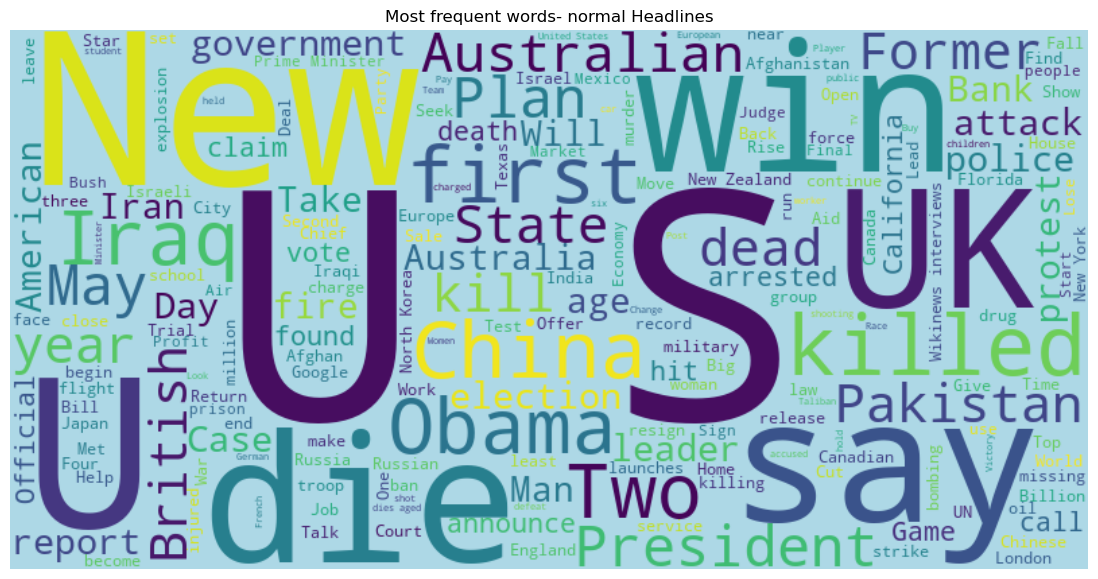

In [15]:
# 2. WordCloud for clickbait headlines
TrueCBs = " ".join(inputKaggleData[inputKaggleData['clickbait'] == 1]['headline'])
NonCBs = " ".join(inputKaggleData[inputKaggleData['clickbait'] == 0]['headline'])

# Generate word clouds
cbCount = wcCBPackage(
    width=800, 
    height=400, 
    background_color='lightgreen', 
    ).generate(TrueCBs)
nonCbCount = wcCBPackage(width=800, height=400, background_color='lightblue').generate(NonCBs)

# printing key words
matPlotCBPackage.figure(figsize=(17, 7))
matPlotCBPackage.imshow(cbCount, interpolation='bilinear')
matPlotCBPackage.title("Most Freuent words- Clickbaits", fontsize=12)
matPlotCBPackage.axis('off')
matPlotCBPackage.show()

matPlotCBPackage.figure(figsize=(17, 7))
matPlotCBPackage.imshow(nonCbCount, interpolation='bilinear')
matPlotCBPackage.title("Most frequent words- normal Headlines", fontsize=12)
matPlotCBPackage.axis('off')
matPlotCBPackage.show()

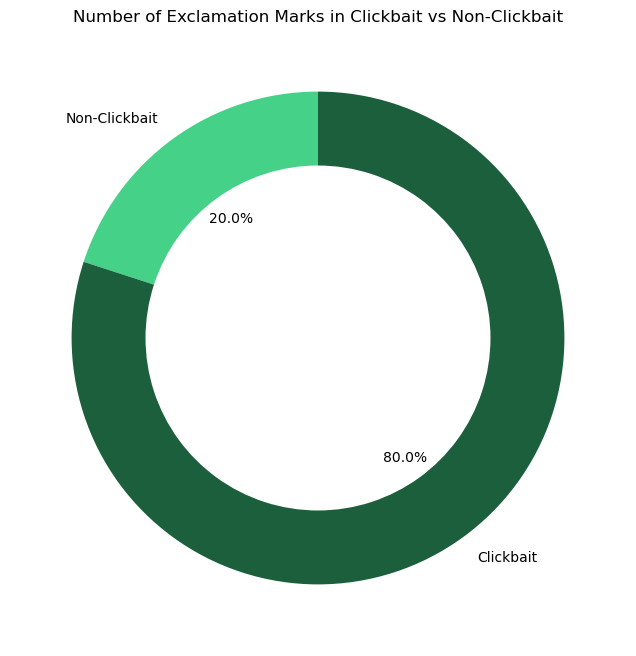

In [16]:
# Calculate the average exclamation mark count for Clickbait and Non-Clickbait
inputKaggleData['exclamation_count'] = inputKaggleData['headline'].apply(lambda x: str(x).count('!'))

esclCnt = inputKaggleData.groupby('clickbait')['exclamation_count'].mean()

# Prepare data for the donut chart
lbl = ['Non-Clickbait', 'Clickbait']

colComb = ['#45D188', '#1C5F3C']

# Create the Donut Chart
matPlotCBPackage.figure(figsize=(8, 8))
matPlotCBPackage.pie(
    esclCnt.values,
    labels=lbl,
    colors=colComb,
    startangle=90,
    wedgeprops=dict(width=0.3),  # Width of the donut
    autopct='%1.1f%%'
)
matPlotCBPackage.title('Number of Exclamation Marks in Clickbait vs Non-Clickbait')
matPlotCBPackage.show()

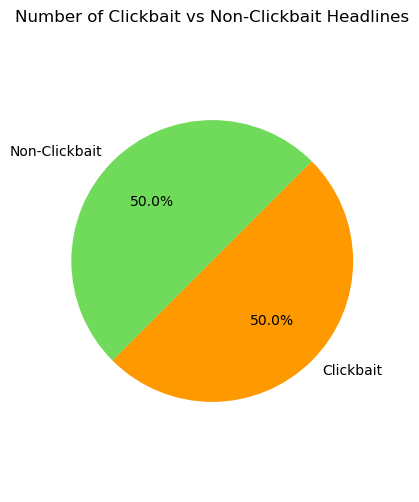

In [19]:
# Pie chart to highlight the partition of non-clickbait and clickbait
cbCnt = inputKaggleData['clickbait'].value_counts()
cbLbls = ['Non-Clickbait', 'Clickbait']

matPlotCBPackage.figure(figsize=(4, 6))
matPlotCBPackage.pie(cbCnt, labels=cbLbls, autopct='%1.1f%%', startangle=45, colors=['#70DB5A', '#FE9900'])
matPlotCBPackage.title('Number of Clickbait vs Non-Clickbait Headlines')
matPlotCBPackage.axis('equal')
matPlotCBPackage.show()